In [17]:
import tkinter as tk
from ITK_viewer import MainWindow
import SimpleITK as sitk
import asyncio

# https://gist.github.com/sankhakarfa/35e522c31677fbc20b0e165cb05f9b41
async def run_tk(root, interval=0.1):
    '''
    Run a tkinter app in an asyncio event loop.
    '''
    try:
        while True:
            
            await root.update()
            await asyncio.sleep(interval)
    except tk.TclError as e:
        if "application has been destroyed" not in e.args[0]:
            raise

root = tk.Tk()
async def main(root):
    app = MainWindow(root)
    await run_tk(app)

loop = asyncio.get_running_loop()
loop.create_task(main(root))
await asyncio.sleep(5)
mainwindow = root._nametowidget('!mainwindow')


INFO:Loading plugins
INFO:Loaded plugins: {'SAM_segmentation': <plugins.itk_viewer_plugin_SAM_segmentation.SAM_segmentation object at 0x000001D65295B520>, 'manual_segmentation': <plugins.itk_viewer_plugin_manual_segmentation.manual_segmentation object at 0x000001D65295B9A0>}


In [18]:
def get_dummy_SITK_image():
    """placeholder"""
    image = sitk.Image(128,128,50, sitk.sitkInt16)
    number = 10
    for i in range(int(image.GetSize()[0]/2)):
        image[i*2, :,:] = number
        number += 3
    
    for i in range(int(image.GetSize()[1]/2)):
        image[:, i*2, :] += number
        number += 3
    image.SetSpacing([2,3,1])
    image.SetOrigin([6,0.15,0])
    image.SetDirection([1,0.25,0,0,0.75,0,0,0,1])
    return image

In [19]:
random_itk_image = get_dummy_SITK_image()
mainwindow.new_image_input(random_itk_image, "example_name.nii.gz", add=True)


INFO:Importing patient data


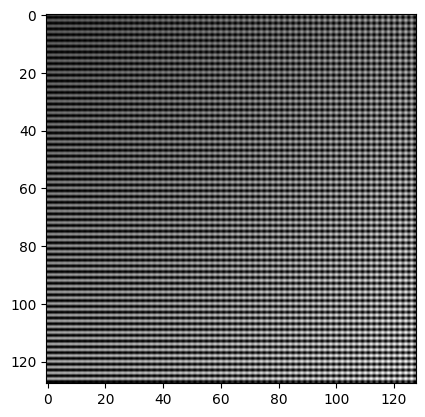

In [20]:
import matplotlib.pyplot as plt
import numpy as np

np_ITK_image = sitk.GetArrayViewFromImage(random_itk_image)

"""plot image"""
plt.imshow(np_ITK_image[5,:,:], cmap='gray')
plt.show()


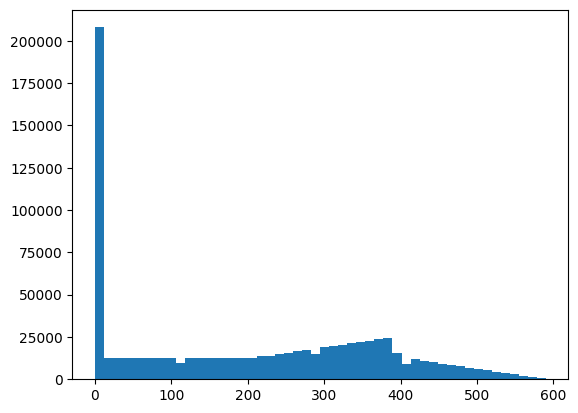

In [21]:
#histogram
plt.hist(np_ITK_image.flatten(), bins=50)
plt.show()
